# Studi Kasus Self Organizing Map (Segmentasi Pelanggan Berdasarkan RFM Model)

Perusahaan e-commerce tempat Anda bekerja meminta anda untuk menganalisis pasar dan menemukan jenis-jenis pelanggan yang ada. Untuk menyelesaikan tugas tersebut anda memutuskan untuk membuat model RFM dari data pelanggan dan mengklasterisasikannya menggunakan Self Organizing Maps

# Data Loading & Inspection

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
np.set_printoptions(threshold=np.inf)

In [2]:
from google.colab import files

files.upload()

df = pd.read_csv('RFM.csv')

Saving RFM.csv to RFM.csv


In [3]:
df.head()

,Monetary,Recency,Frequency
0,11.253944,5.784133,0.000000
1,6.536097,0.741937,2.397895
2,8.253595,-2.302585,5.347108
3,4.589549,1.131402,1.609438
4,4.065602,1.131402,1.386294


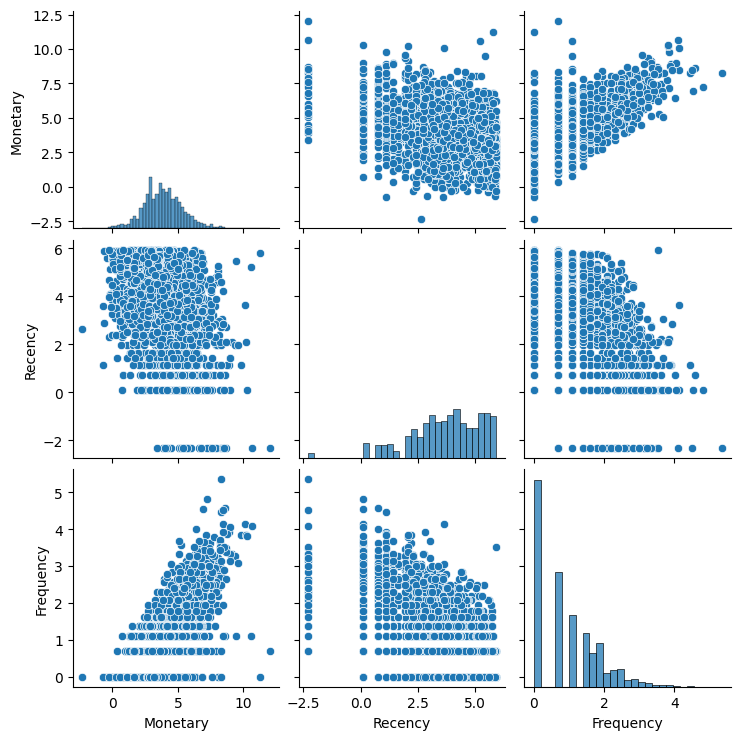

In [4]:
sns.pairplot(df)

# Implementasi SOM

Dari data diatas, buatlah sebuah model SOM untuk mengklasterisasi data RFM yang diberikan. Ujikan klaster menggunakan silhouette score pada jumlah cluster yang beragam. Visualisasikan hasil klasterisasi dengan pairplot dan berikan warna yang berbeda untuk setiap klaster

In [23]:
# Implementasi SOM untuk data diatas

import numpy as np

def som(X, lrate, b, max_epoch, n_cluster):
  centroids = np.random.uniform(size=(n_cluster, len(X[0])))
  epoch = 0
  labels = []

  while epoch < max_epoch:
    for x in X:
      d = [sum((w - x) ** 2) for w in centroids]
      min = np.argmin(d)
      centroids[min] += lrate * (x - centroids[min])

    lrate *= b
    epoch += 1

  for x in X:
    d = [sum((w - x) ** 2) for w in centroids]
    min = np.argmin(d)

    labels.append(min)

  return centroids, labels

def draw(X, target, centroids):
  cluster = pd.DataFrame(X, columns = df.columns)
  cluster['cluster'] = target
  sns.pairplot(cluster, hue = 'cluster', palette = 'tab10')

silhouette score:  0.30270746094268486


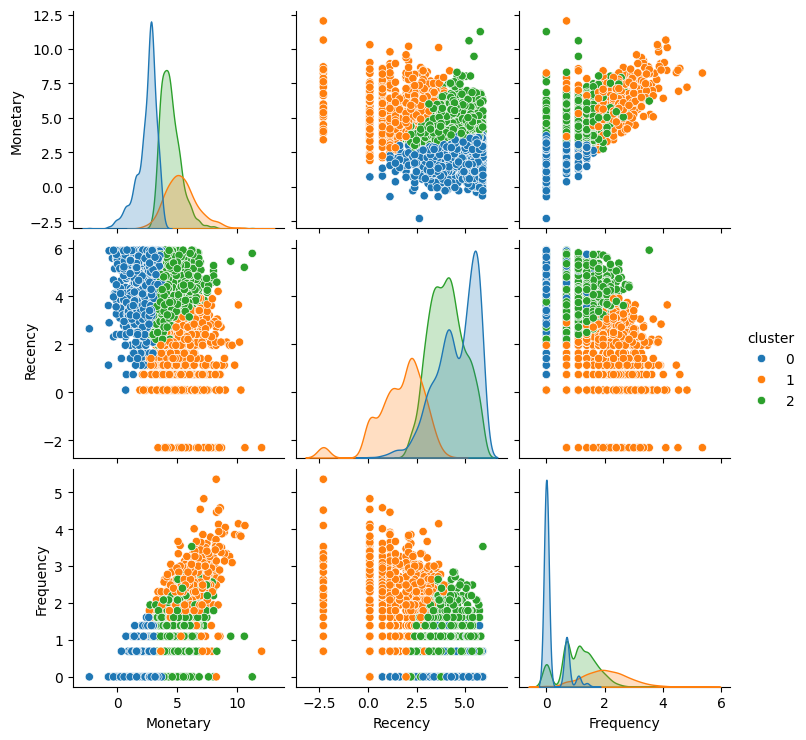

In [24]:
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

X = df.to_numpy()
centroids, labels = som(X, lrate = 0.5, b = 0.5, max_epoch = 100, n_cluster = 3)

silhouette = silhouette_score(X, labels)
print('silhouette score: ', silhouette)
draw(X, labels, centroids)

## Analisis

In [ ]:
#Untuk no.1
lr = [0.5]
b = [0.5]
max_epoch = [100]
n_cluster = [2, 3, 4, 5, 6, 7, 8, 9]

best_sil = 0
best_param = []

for i in lr:
  for j in b:
    for k in max_epoch:
      for l in n_cluster:
        centroids, labels = som(X, i, j, k, l)
        silhouette = silhouette_score(X, labels)

        if silhouette > best_sil:
          best_sil = silhouette
          best_param = [i, j, k, l]

print('silhouette score: ', best_sil)
print('best parameter: ', best_param)

silhouette score:  0.38923928456469625
best parameter:  [0.5, 0.5, 100, 2]


1. Algoritma SOM tidak dapat melakukan klasterisasi sehingga data kurang jelas saat dipisahkan. Terlihat juga pada plot masih terdapat banyak overlapping data. Pemisahan data yang kurang jelas menunjukkan ketidakmampuan model SOM. Lalu nilai silhouette score juga rendah: 0.30270746094268486

2. Berdasarkan proses tuning diatas, cluster yang paling optimal adalah berjumlah 2

silhouette score:  0.38923928456469625


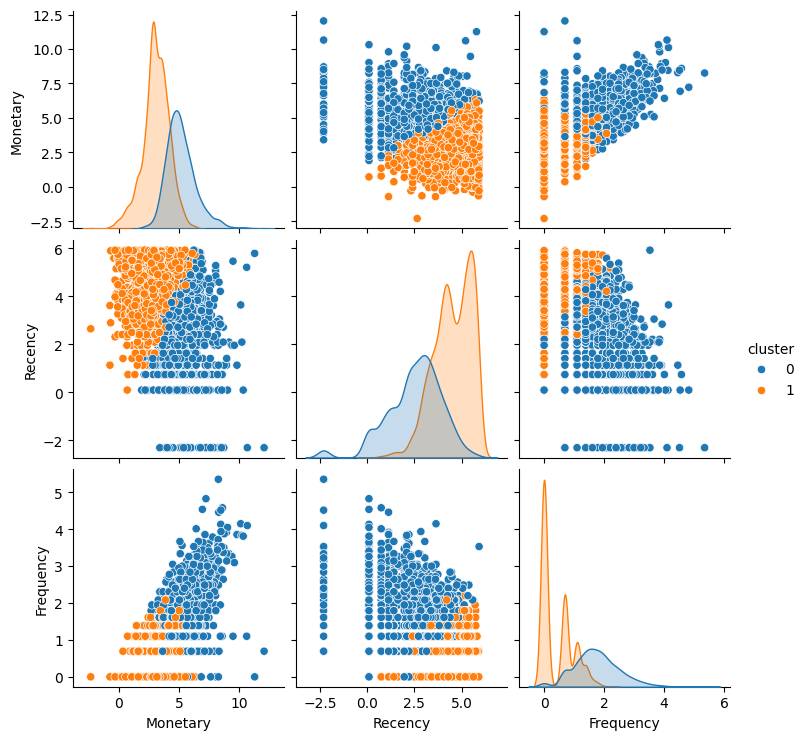

In [20]:
centroids, labels = som(X, lrate = 0.5, b = 0.5, max_epoch = 100, n_cluster = 2)

silhouette = silhouette_score(X, labels)
print('silhouette score: ', silhouette)
draw(X, labels, centroids)

3. cluster berwarna biru memiliki karakteristik seperti: Banyak pelanggan biru menghabiskan uang tetapi tidak pada waktu yang dekat, lalu pelanggan juga cenderung menghabiskan banyak uang pada frekuensi yang tinggi. 

Cluster berwarna orange memiliki karakteristik seperti: Banyak pelanggan menghabiskan uang pada waktu yang dekat, lalu pelanggan juga memiliki penegluaran yang kecil dan frekuensi yang kecil.



